# House Loan Eligibility Prediction


### Domain:
 - Finance and Banking.
 
### Context:
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customers first apply for a home loan after that company manually validates the customer eligibility for loan. 
Company wants to automate the loan eligibility process based on customer detail provided while filling the details online. 
They need a web application where a user can access their website and register, login, and enter the required details such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others for checking the eligibility for the home loan.
    

### Project Objective:
1) This is a standard supervised classification task. A classification problem where we have to predict whether a customer is eligible for loan or not based on a given set of independent variable(s).

2) To build a Python Flask ML application where a user has to get registered by entering the username and password and login to the website and then enter their details to check whether they are eligible for loan or not.



### Model Building and saving the model using Pickle

#### 1. Import required libraries and read the dataset.

In [104]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [105]:
df = pd.read_csv('loan_approval_data.csv')
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


#### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [106]:
df.sample(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
526,lp002705,male,yes,0.0,graduate,no,3775,0.0,110.0,360.0,1.0,semiurban,y
21,lp001046,male,yes,1.0,graduate,no,5955,5625.0,315.0,360.0,1.0,urban,y
153,lp001532,male,yes,2.0,not graduate,no,2281,0.0,113.0,360.0,1.0,rural,n
491,lp002562,male,yes,1.0,not graduate,no,5333,1131.0,186.0,360.0,NaN,urban,y
362,lp002175,male,yes,0.0,graduate,no,4750,2333.0,130.0,360.0,1.0,urban,y


In [107]:
df.shape

(614, 13)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [109]:
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
dependents,599.0,0.762938,1.015216,0.0,0.0,0.0,2.00,3.0
applicantincome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
coapplicantincome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
loanamount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
loan_amount_term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
credit_history,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [110]:
df.describe(include = 'O').T

,count,unique,top,freq
loan_id,614,614,lp001002,1
gender,601,2,male,489
married,611,2,yes,398
education,614,2,graduate,480
self_employed,582,2,no,500
property_area,614,3,semiurban,233
loan_status,614,2,y,422


#### 3.Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features.

In [111]:
df.isnull().sum()/len(df)*100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

In [112]:
# dropping the rows with missing vales
df.dropna(axis=0, inplace=True)

In [113]:
# Converting credit_history column to Integer datatype
df['credit_history'] = df['credit_history'].astype(int)

In [114]:
# Dropping the loan_id column
df.drop('loan_id',axis=1,inplace=True)

#### 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.

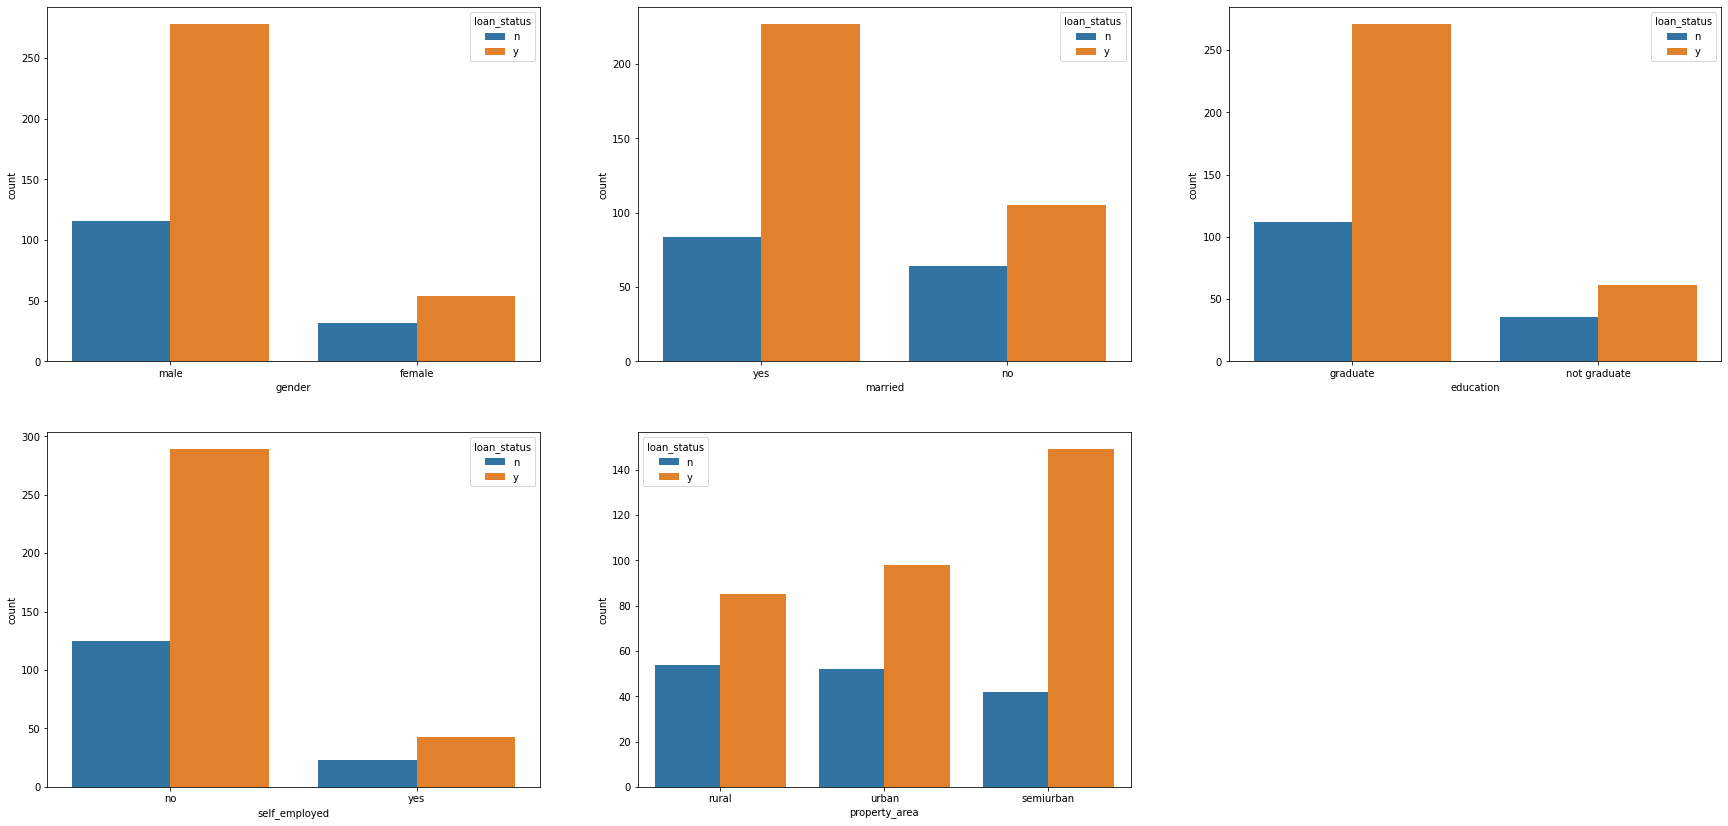

In [115]:
cat_features = ['gender','married','education','self_employed','property_area']

i=1
plt.figure(figsize=(30,30))
for feature in cat_features:
    plt.subplot(4,3,i)
    sns.countplot(x=feature,hue='loan_status',data=df)
    i+=1

- Majority of the Loan holder are male as compared to females.
- Most of the loan holders are married and have a graduate degree and are not self employed.

#### 5. Encode the categorical data.

In [116]:
# Label encoding property_area
object_type_variables=[i for i in df.columns if df.dtypes[i]==object]
object_type_variables

le =LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q=le.fit_transform(df[i].astype(str))
        df[i]=q
        df[i]=df[i].astype(int)
encoder(df)

In [117]:
df.head(2)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1,2,1


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             480 non-null    int32  
 1   married            480 non-null    int32  
 2   dependents         480 non-null    float64
 3   education          480 non-null    int32  
 4   self_employed      480 non-null    int32  
 5   applicantincome    480 non-null    int64  
 6   coapplicantincome  480 non-null    float64
 7   loanamount         480 non-null    float64
 8   loan_amount_term   480 non-null    float64
 9   credit_history     480 non-null    int32  
 10  property_area      480 non-null    int32  
 11  loan_status        480 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 35.6 KB


#### 6. Separate the target and independent features and split the data into train and test.

In [119]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [120]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(336, 11) (144, 11)
(336,) (144,)


In [121]:
X_train.head(2)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
409,1,1,3.0,0,0,81000,0.0,360.0,360.0,0,0
241,1,1,1.0,1,0,2510,1983.0,140.0,180.0,1,2


In [122]:
X_test.head(2)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
519,0,0,0.0,1,0,3400,0.0,95.0,360.0,1,0
488,1,1,2.0,0,1,4583,2083.0,160.0,360.0,1,1


#### 7. Build any classification model to predict the loan status of the customer and save your model using pickle.

In [123]:
def fit_n_predict(model, X_train, X_test, y_train, y_test): 
    # Fit the model with train data
    model.fit(X_train, y_train)
    
    # Making prediction on test set
    pred=model.predict(X_test)
    
    # Calculating the accuracy score
    accuracy = accuracy_score(y_test, pred)
    
    return accuracy 

In [124]:
# Initializing the Models

lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf',rf),('knn',knn),('gb',gb),('adb',adb)]
sc = StackingClassifier(estimators = estimators, final_estimator=rf)

In [125]:
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr,nb,knn,dt,rf,adb,gb,sc],
                            ['Logistic Regression','Naive Bayes','KNN','Descision Tree',
                            'Random Forest','Ada Boost','Gradient Boost','Stacking']):  
    result.loc[model_name] = fit_n_predict(model,X_train, X_test, y_train, y_test)

In [126]:
result

,Accuracy
Logistic Regression,0.812500
Naive Bayes,0.784722
KNN,0.583333
Descision Tree,0.687500
Random Forest,0.798611
Ada Boost,0.784722
Gradient Boost,0.770833
Stacking,0.791667


- Logistic Regression has the highest accuracy score of 81.25%

In [129]:
# Using Logistic Regression
lr = LogisticRegression()

model = lr.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8125


In [130]:
import pickle
# Saving model to disk
pickle.dump(rf, open('model_loan.pkl','wb'))